<a href="https://colab.research.google.com/github/Tonaykundu/1st-/blob/main/fristtumerdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! nvidia-smi

Sun Jul 27 20:56:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import glob
import os

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
import os

input_folder="/content/drive/MyDrive/brain strock"

output="/content/drive/MyDrive/brainstrockoutput"

splitfolders.ratio(input_folder, output, seed=42, ratio=(0.7,0.2,0.1)) ### train 75%, val 15%, test 10%

Copying files: 0 files [00:00, ? files/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
####### transfer learning model

################# import various transfer elarning models ###################

from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.vgg19 import VGG19
#from tensorflow.keras.applications import Xception
#from tensorflow.keras.applications import Xception
#############################################################################

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='elu'))       # Hidden layer
model.add(layers.Dense(2, activation='softmax'))     # Output layer → 2 classes

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
  loss='categorical_crossentropy', ### for multi class calsification
  #loss='binary_crossentropy', ### for binary calsification
  optimizer=adam,
  metrics=['accuracy']
)

#########################################################################

model.optimizer.get_config()
print("\n\n")
model.summary()

NameError: name 'model' is not defined

In [ ]:
### image datagenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/brain strock/mypms/Brain_Stroke_CT-SCAN_image/Train',
                                                 target_size = (62,62),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/brain strock/mypms/Brain_Stroke_CT-SCAN_image/Validation',
                                            target_size = (62,62),
                                            batch_size = 16,
                                            class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/brain strock/mypms/Brain_Stroke_CT-SCAN_image/Test',
                                            target_size = (62,62),
                                            batch_size = 16,
                                            class_mode = 'categorical')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/brain strock/mypms/Brain_Stroke_CT-SCAN_image/Train'

In [ ]:
# U-Net মডেল ডিফাইন করা
def unet_model(input_size=(224, 224, 3)):
    inputs = layers.Input(input_size)

    # U-Net আর্কিটেকচার
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)

    up1 = layers.UpSampling2D((2, 2))(pool1)
    concat1 = layers.concatenate([conv1, up1], axis=3)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(concat1)

    output = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv2)

    model = Model(inputs, output)
    return model

# সেগমেন্টেশন মডেল তৈরি করা
segmentation_model = unet_model(input_size=(224, 224, 3))
segmentation_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# সেগমেন্টেশন মডেল ট্রেইন করার জন্য ডেটা ব্যবহার করুন
segmentation_model.fit(training_set, epochs=50, validation_data=val_set)

NameError: name 'training_set' is not defined

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# Define the correct filepath ending in `.weights.h5`
filepath = "/content/drive/MyDrive/storebrainstockcnn/CNN.weights.h5"

# Define the ModelCheckpoint
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                               save_weights_only=True, save_best_only=True, mode='max')

# Define the CSVLogger
log_csv = CSVLogger('/content/drive/MyDrive/storebrainstockcnn/cnn.csv', separator=',', append=False)

# List of callbacks
callbacks_list = [checkpoint1, log_csv]

# Fit the model
r = model.fit(
    training_set,
    epochs=50,
    validation_data=val_set,
    steps_per_epoch=len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list
)


Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8059 - loss: 0.4236
Epoch 1: val_accuracy improved from -inf to 0.75745, saving model to /content/drive/MyDrive/storebrainstockcnn/CNN.weights.h5
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.8058 - loss: 0.4237 - val_accuracy: 0.7574 - val_loss: 0.6559
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7965 - loss: 0.4194
Epoch 2: val_accuracy improved from 0.75745 to 0.76596, saving model to /content/drive/MyDrive/storebrainstockcnn/CNN.weights.h5
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.7964 - loss: 0.4194 - val_accuracy: 0.7660 - val_loss: 0.7174
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8167 - loss: 0.4059
Epoch 3: val_accuracy did not improve from 0.76596
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.8166 - loss: 0.4059 - val_accuracy: 0.7532 - val_loss: 0.7391
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8096 -

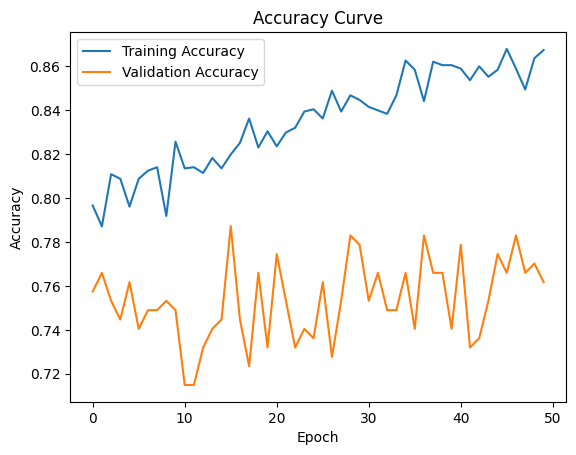

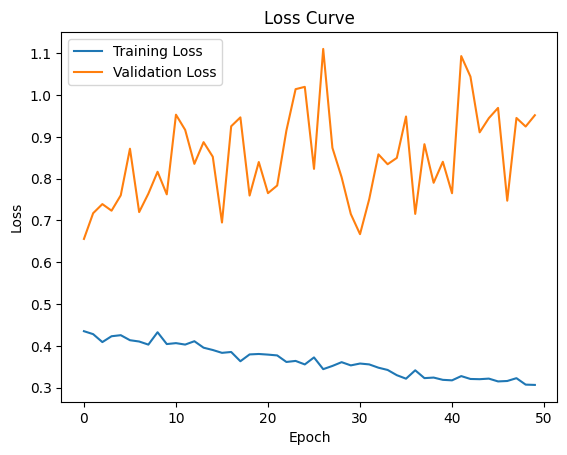

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/drive/MyDrive/storebrainstockcnn/cnn.csv')

# Plot accuracy
plt.plot(data['epoch'], data['accuracy'], label='Training Accuracy')
plt.plot(data['epoch'], data['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(data['epoch'], data['loss'], label='Training Loss')
plt.plot(data['epoch'], data['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Load weights
model.load_weights('/content/drive/MyDrive/storebrainstockcnn/CNN.weights.h5')  ### Load weights from the .weights.h5 file

# Evaluate the model
preds = model.evaluate(test_set)

# Print results
print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.7862 - loss: 0.5672
Loss = 0.5874751210212708
Test Accuracy = 0.7734553813934326


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step


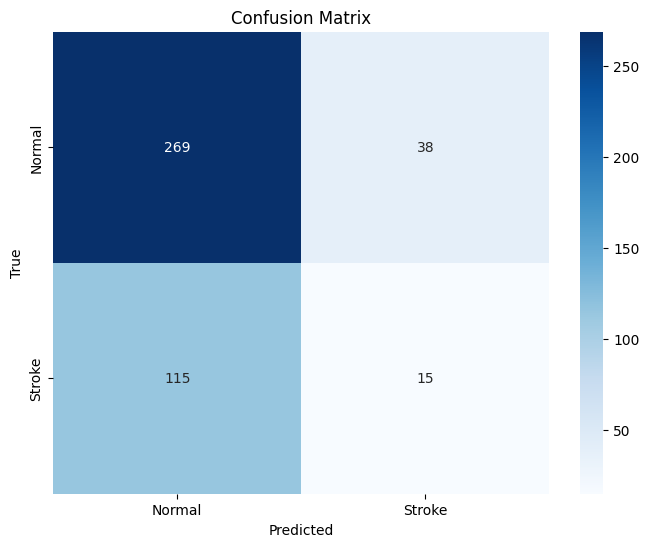

              precision    recall  f1-score   support

      Normal       0.70      0.88      0.78       307
      Stroke       0.28      0.12      0.16       130

    accuracy                           0.65       437
   macro avg       0.49      0.50      0.47       437
weighted avg       0.58      0.65      0.60       437



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions using the trained model
y_pred = model.predict(test_set)  # Use model.predict instead of model.predict_generator
y_true = test_set.labels  # Ground truth labels

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# You can also generate a classification report for more detailed metrics
class_report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=test_set.class_indices.keys())
print(class_report)

In [ ]:
#########
IMAGE_SIZE = [224,224]
CLASS=2
######


#mod =  tf.keras.applications.VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
mod = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in mod.layers:
    layer.trainable = False

x = Flatten()(mod.output)

prediction = Dense(CLASS, activation='elu')(x)

model = Model(inputs=mod.input, outputs=prediction)

############################ optimizer and learning rate ##################

adam = tf.keras.optimizers.Nadam(learning_rate=0.0001)

model.compile(
  loss='categorical_crossentropy', ### for multi class calsification
  #loss='binary_crossentropy', ### for binary calsification
  optimizer=adam,
  metrics=['accuracy']
)

#########################################################################


model.optimizer.get_config()
print("\n\n")
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_102 (Conv2D) │ (None, 111, 111,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_102[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_103 (Conv2D) │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_103[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_104 (Conv2D) │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_104[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_105 (Conv2D) │ (None, 54, 54,    │      5,120 │ max_pooling2d_6[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_105[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_106 (Conv2D) │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_106[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 102,402 (400.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
### image datagenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/brain strock/mypms/Brain_Stroke_CT-SCAN_image/Train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/brain strock/mypms/Brain_Stroke_CT-SCAN_image/Validation',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/brain strock/mypms/Brain_Stroke_CT-SCAN_image/Test',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1893 images belonging to 2 classes.
Found 235 images belonging to 2 classes.
Found 437 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# Define the correct filepath ending in `.weights.h5`
filepath = "/content/drive/MyDrive/transferlerningfilepath/CNN.weights.h5"

# Define the ModelCheckpoint
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                               save_weights_only=True, save_best_only=True, mode='max')

# Define the CSVLogger
log_csv = CSVLogger('/content/drive/MyDrive/transferlerningfilepath/CNN.csv', separator=',', append=False)

# List of callbacks
callbacks_list = [checkpoint1, log_csv]

# Fit the model
r = model.fit(
    training_set,
    epochs=50,
    validation_data=val_set,
    steps_per_epoch=len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list
)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.5106 - loss: 2.6931

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.66809, saving model to /content/drive/MyDrive/transferlerningfilepath/CNN.weights.h5
60/60 ━━━━━━━━━━━━━━━━━━━━ 66s 823ms/step - accuracy: 0.5114 - loss: 2.6716 - val_accuracy: 0.6681 - val_loss: 0.6316
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.6009 - loss: 0.6657
Epoch 2: val_accuracy did not improve from 0.66809
60/60 ━━━━━━━━━━━━━━━━━━━━ 57s 544ms/step - accuracy: 0.6010 - loss: 0.6656 - val_accuracy: 0.6681 - val_loss: 0.6166
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.6153 - loss: 0.6392
Epoch 3: val_accuracy improved from 0.66809 to 0.68085, saving model to /content/drive/MyDrive/transferlerningfilepath/CNN.weights.h5
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 556ms/step - accuracy: 0.6153 - loss: 0.6392 - val_accuracy: 0.6809 - val_loss: 0.5939
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.6457 - loss: 0.6321
Epoch 4: val_accuracy improved from 0.68085 to 0.70638, saving model to

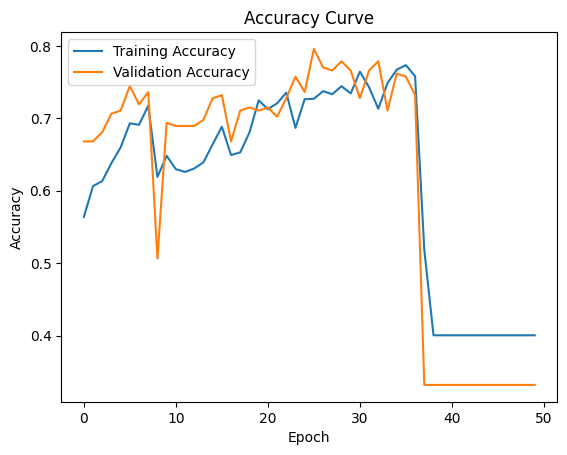

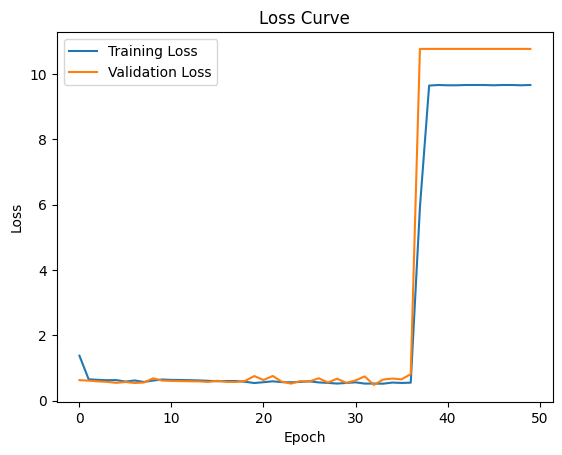

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/drive/MyDrive/transferlerningfilepath/CNN.csv')

# Plot accuracy
plt.plot(data['epoch'], data['accuracy'], label='Training Accuracy')
plt.plot(data['epoch'], data['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(data['epoch'], data['loss'], label='Training Loss')
plt.plot(data['epoch'], data['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make sure to run the VGG16 model definition cell (9LWN1gewOWTv) before this cell

# Load weights
model.load_weights('/content/drive/MyDrive/transferlerningfilepath/CNN.weights.h5')


# Evaluate the model
preds = model.evaluate(test_set)

# Print results
print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 651ms/step - accuracy: 0.7365 - loss: 0.5685
Loss = 0.5773329734802246
Test Accuracy = 0.7345537543296814


14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 550ms/step


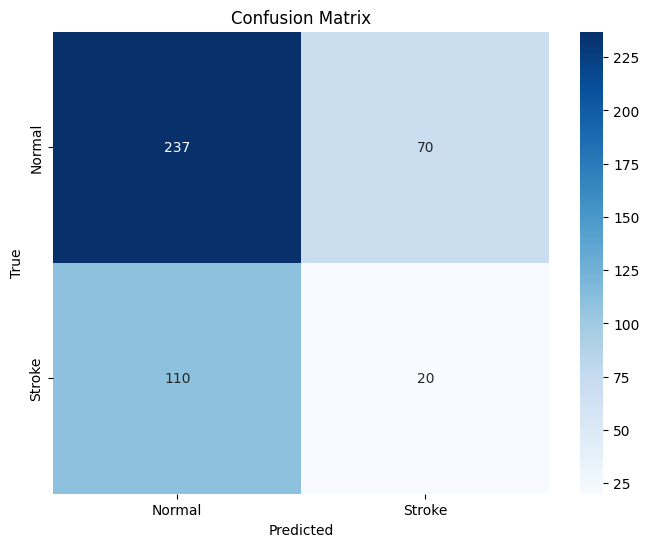

              precision    recall  f1-score   support

      Normal       0.68      0.77      0.72       307
      Stroke       0.22      0.15      0.18       130

    accuracy                           0.59       437
   macro avg       0.45      0.46      0.45       437
weighted avg       0.55      0.59      0.56       437



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions using the trained model
y_pred = model.predict(test_set)  # Use model.predict instead of model.predict_generator
y_true = test_set.labels  # Ground truth labels

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# You can also generate a classification report for more detailed metrics
class_report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=test_set.class_indices.keys())
print(class_report)
